In [1]:
import percolating_network
from percolating_network import Wire
from percolating_network import WireNetwork

In [6]:
net = WireNetwork(128, 128, 27)
from time import time
start = time()
res = net.percolate()
stop = time()
print(stop - start)
print(res)

2.96848201751709
93042


In [6]:

373673/(256**2)

5.7017974853515625

In [13]:
list(net.clusters[0])[0].mid

(0, 2.5)

In [20]:
def function_test():
    for i in range(10000):
        second_function()

def second_function():
    a = 1
    b = 2
    c = 3

%timeit function_test()

489 µs ± 2.18 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [21]:
def function_test2():
    for i in range(10000):
        a = 1
        b = 2
        c = 3

%timeit function_test2()

174 µs ± 1.35 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [26]:
a = [1,2,3,4,5]

for i in a:
    print(a)
    if i == 2 or 4:
        a.remove(i)
    print(a)

[1, 2, 3, 4, 5]
[2, 3, 4, 5]
[2, 3, 4, 5]
[2, 4, 5]
[2, 4, 5]
[2, 4]


In [31]:
i, j = 0, 1
neighbours = [
    (i-1, j+1), (i, j+1), (i+1, j+1),
    (i-1, j), (i, j), (i+1, j),
    (i-1, j-1), (i, j-1), (i+1, j-1)
]
neighbours = [neighbour for neighbour in neighbours if not (neighbour[0]<0 or neighbour[1]<0)]

In [34]:
a = [1,2,3,4]
b = [5,6,7,8]
c = [9,10,11,12]

s = [a,b,c]

In [35]:
import itertools

list(itertools.chain.from_iterable(s))

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

### Speed Tests and scaling

In [1]:
import time

import percolating_wires.percolation_network
from percolation_network import WireNetwork
from percolation_network import Wire
import numpy as np

import matplotlib.pyplot as plt

ModuleNotFoundError: No module named 'percolation_network'

In [2]:
net = WireNetwork(256, 256, seed=12)
result = net.percolate()

KeyboardInterrupt: 

In [6]:

seeds = np.random.choice(np.arange(0,100000), 3, replace=False)
sizes = [2,4,8,16,32,36,40,48,64,96,128]
times = np.zeros((len(sizes), len(seeds)))
for n, size in enumerate(sizes):
    for m, seed in enumerate(seeds):
        start = time.time()
        net = WireNetwork(size, size, seed=seed)
        result = net.percolate()
        stop = time.time()
        times[n,m] = (stop-start)*1000

# print(f"{np.array(times).mean()*1000:.2f} ± {np.array(times).std()*1000:.2f}")

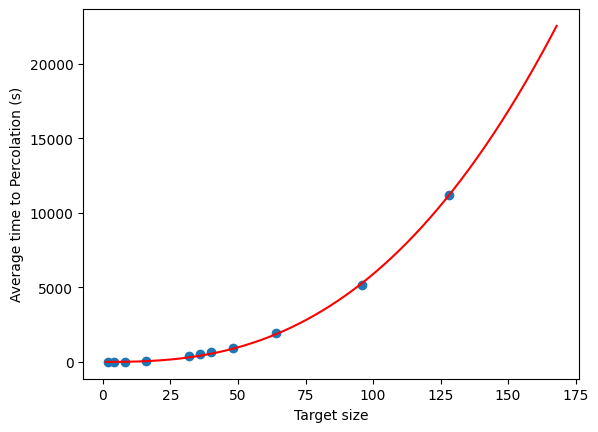

In [7]:
import scipy.optimize as opt

mean_times = times.mean(axis=1)
std_times = times.std(axis=1)

def fit(x, a, b):
    return a*(x**b)

popt, pcov = opt.curve_fit(fit, sizes, mean_times)

X = np.linspace(1,168,1000)
Y = fit(X, *popt)

plt.plot(np.array(sizes), mean_times, marker='o', ls='')
plt.plot(X, Y, 'r')
plt.xlabel("Target size")
plt.ylabel("Average time to Percolation (s)")
plt.show()

In [8]:
print(popt)

[0.03924039 2.58806786]


So time grows ~ $S^{2.5}$

In [7]:
i = []
i[-1]

IndexError: list index out of range

In [2]:
import cProfile
import percolating_network
from percolating_network import WireNetwork
from percolating_network import Wire

net = WireNetwork(256,256,27)
net.percolate()

cProfile.run('net.percolate()', sort='cumtime')

         17979473 function calls in 19.536 seconds

   Ordered by: cumulative time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.000    0.000   19.536   19.536 {built-in method builtins.exec}
        1    0.000    0.000   19.536   19.536 <string>:1(<module>)
        1    1.679    1.679   19.536   19.536 percolating_network.py:48(percolate)
   373674    6.654    0.000    9.642    0.000 percolating_network.py:124(_get_intercepts)
   373674    2.057    0.000    3.686    0.000 percolating_network.py:99(_get_neighbours)
   373673    1.544    0.000    2.920    0.000 percolating_network.py:151(_merge)
  9540255    2.861    0.000    2.861    0.000 percolating_network.py:234(do_intersect)
    83295    1.315    0.000    1.315    0.000 {method 'union' of 'set' objects}
  1121022    1.185    0.000    1.185    0.000 {method 'uniform' of 'numpy.random.mtrand.RandomState' objects}
   373674    1.057    0.000    1.057    0.000 percolating_network.py:119(<listc

In [4]:
%%timeit
net = WireNetwork(256,256,27)
net.percolate()

13.2 s ± 235 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [10]:
def orientation(p, q, r) -> int:
    val = ((q[1] - p[1]) * (r[0] - q[0])) - ((q[0] - p[0]) * (r[1] - q[1]))
    if (val > 0):
        return 1
    elif (val < 0):
        return 2
    else:
        return 0
  
def do_intersect(p1, q1, p2, q2) -> bool:
    o1 = orientation(p1, q1, p2)
    o2 = orientation(p1, q1, q2)
    o3 = orientation(p2, q2, p1)
    o4 = orientation(p2, q2, q1)
  
    if ((o1 != o2) and (o3 != o4)):
        return True
    return False
    

%timeit do_intersect([0,0], [2,0], [1,1],[1,-2])

879 ns ± 1.63 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)


In [11]:
import math
class Point:
    def __init__(self,x,y):
        self.x = x
        self.y = y
        
def solve(p1,q1,p2,q2):
    dx1=p1[0]-q1[0]
    dy1=p1[1]-q1[1]
    dx2=p2[0]-q2[0]
    dy2=p2[1]-q2[1]
    
    m1=(dy1)/(dx1) if dx1 != 0 else math.inf
    m2=(dy2)/(dx2) if dx2 != 0 else math.inf
    
    c1 = p1[1] - m1*p1[0]
    c2 = p2[1] - m2*p2[0]
       

    xRes = (c2-c1)/(m1-m2)
    yRes = (m1*c2-m2*c1)/(m1-m2)
    
    if xRes in range(min(p1[0],p2[0],q1[0],q2[0]),max(p1[0],p2[0],q1[0],q2[0])+1):
        if yRes in range(min(p1[1],p2[1],q1[1],q2[1]),max(p1[1],p2[1],q1[1],q2[1])+1):
            return True
    else:
        return False
          
p1=(10,0)
q1=(0,10)
p2=(0,0)
q2=(10,10)
%timeit solve(p1,q1,p2,q2)

1.15 µs ± 1.41 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)


In [4]:
from joblib import Parallel, delayed
import multiprocessing

multiprocessing.cpu_count()

8

In [5]:
type(1)

int

In [5]:
import numpy as np
seeds = np.random.choice(np.arange(0,100000), 512, replace=False)
sizes = [64]
results = np.zeros((len(sizes), len(seeds)))

def job(size, seed):
    net = WireNetwork(size, size, seed=seed)
    return net.percolate()
import time

start = time.time()
for j, size in enumerate(sizes):
    results [j,:] = Parallel(n_jobs=8)(delayed(job)(size, seed) for seed in seeds)
    # for i, seed in enumerate(seeds):
    #     net = WireNetwork(size, size, seed=seed)
    #     results[j,i] = net.percolate()
stop = time.time()
print(stop - start)

53.01799201965332


In [7]:
results.mean(axis=1)/np.square(sizes)

array([5.64453077])

In [218]:
from scipy.signal import poisson

R_nl = np.zeros(1000)
for n in results:
    for j in range(0, len(R_nl)):
        if j >= n:
            R_nl[j] += 1/len(results)

N = np.linspace(0,12,100000)
mu = N * 25
R_N = []
for n in range(0,1000):
    pmf = poisson.pmf(n, mu)

    R = pmf * R_nl[n]

    R_N.append(R)

R_N = np.array(R_N).sum(axis=0)

1000


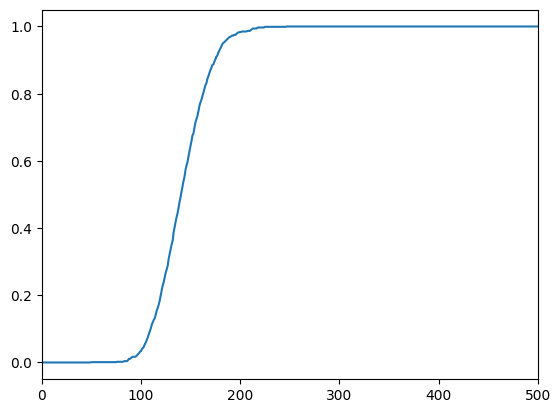

In [222]:
plt.plot(R_nl)
plt.xlim(0,500)
print(len(R_nl))

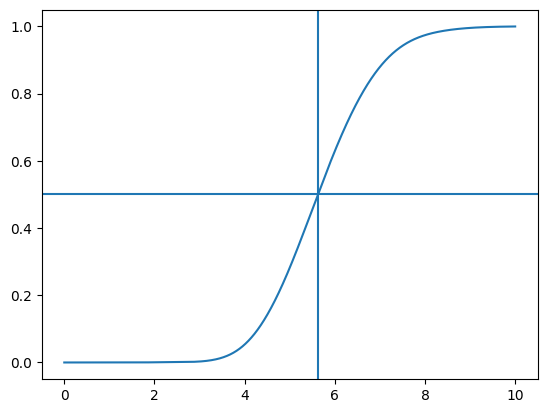

In [236]:
R_N = np.array(R_N)
plt.plot(N, R_N.sum(axis=0))
plt.axhline(0.5)
plt.axvline(5.62)
# plt.xlim(0,2)

In [70]:
import itertools

wires = list(itertools.chain.from_iterable(net.coordinate_grid.values()))

In [2]:
import matplotlib.pyplot as plt

In [51]:
results10x10/100

TypeError: unsupported operand type(s) for /: 'list' and 'int'

In [2]:
import time
from joblib import Parallel, delayed
import multiprocessing

yes = []
# for count in [2,4,8,16,32,64,128,256,512]:
seeds = np.random.choice(np.arange(0,100000), 8, replace=False)
sizes = [8,16,32,36]
results = np.zeros((len(sizes), len(seeds)))

def job(size, seed):
    net = WireNetwork(size, size, seed=seed)
    return net.percolate()
start = time.time()
for j, size in enumerate(sizes):
    results [j,:] = Parallel(n_jobs=8)(delayed(job)(size, seed) for seed in seeds)
stop = time.time()
print(stop - start)

NameError: name 'np' is not defined

In [35]:
import scipy.optimize as opt

def line(x,a,b):
    return a*x + b



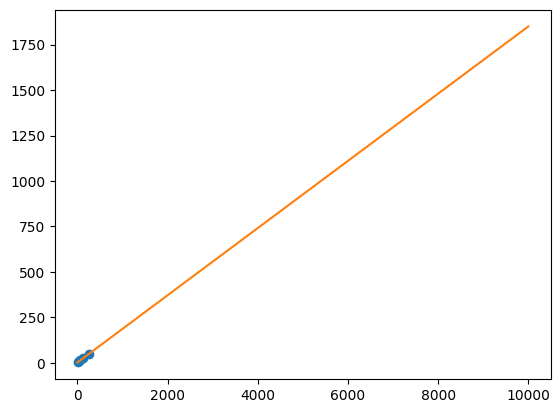

In [37]:
res = [16,32,64,128,256]
dat = [5.15,8,14.7,25.8,49.6]

popt, pcov = opt.curve_fit(line, res, dat)

X = np.linspace(0,10000,10000)
Y = line(X, *popt)

plt.plot(res, dat, ls='', marker='o')
plt.plot(X, Y)
# plt.xlim(0,1000)

In [41]:
line(50000, *popt)/3600

2.5663100358175948

In [43]:
np.arange(8,128,8)

array([  8,  16,  24,  32,  40,  48,  56,  64,  72,  80,  88,  96, 104,
       112, 120])

In [16]:
import numpy as np

def set_seed(seed=32):
    np.random.seed(seed)

def get_seeds(N):
    seeds = np.random.choice(np.arange(0,10000000), N, replace=False)
    return seeds

def choose(seeds):
    for seed in seeds:
        set_seed(seed)
        print(np.random.randint(0,100))

set_seed()
seeds = get_seeds(10)
choose(seeds)


27
14
78
24
83
1
29
70
96
85


# 2D Analysis

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [26]:
results1 = np.load('../Results/Nseeds-1024_sizes-9_20230310_165343.npy')
results2 = np.load('../Results/Nseeds-1024_sizes-9_20230310_171544.npy')
results3 = np.load('../Results/Nseeds-1024_sizes-9_20230310_175222.npy')
results4 = np.load('../Results/Nseeds-2048_sizes-9_20230310_180657.npy')
results5 = np.load('../Results/Nseeds-2048_sizes-9_20230310_182007.npy')
results6 = np.load('../Results/Nseeds-6144_sizes-9_20230310_185026.npy')
results7 = np.load('../Results/Nseeds-12288_sizes-9_20230310_203705.npy')
results8 = np.load('../Results/Nseeds-12288_sizes-9_20230310_214715.npy')
results9 = np.load('../Results/Nseeds-49152_sizes-9_20230311_151644.npy')
results10 = np.load('../Results/Nseeds-12288_sizes-9_20230311_160912.npy')
results = np.concatenate([results1, results2, results3, results4, results5, results6, results7,
                          results8, results9, results10], axis=1)
size = np.array([32,36,40,48,64])
results = results[4:,:]

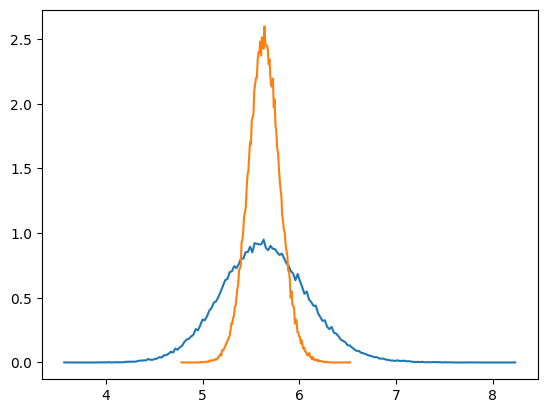

In [4]:
h0, edges0 = np.histogram(results[2]/16**2, bins=200, density=True)
plt.plot(edges0[:-1], h0)
h1, edges1 = np.histogram(results[-1]/64**2, bins=200, density=True)
plt.plot(edges1[:-1], h1)

In [27]:

results.mean(axis=1)/size**2

array([5.64266925, 5.64041219, 5.64192156, 5.63976474, 5.6386308 ])

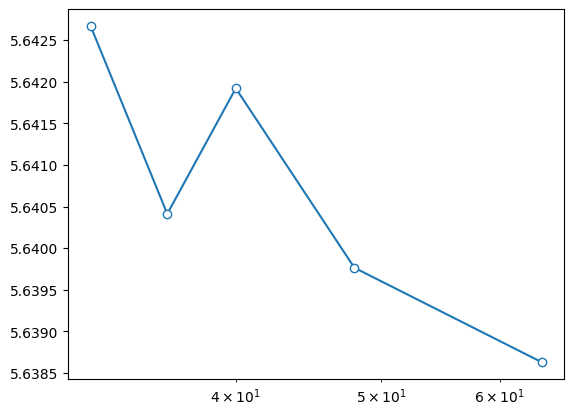

In [28]:
plt.errorbar(size, results.mean(axis=1)/size**2, marker='o', mfc='w')
# plt.yscale('log')
plt.xscale('log')

In [29]:
from scipy.stats import poisson

R_Ns = np.zeros((10,5))

for i, s in enumerate(size):
    result = results[i,:]

    R_nl = np.zeros(int(max(result))*2)
    for n in result:
        for j in range(0, len(R_nl)):
            if j >= n:
                R_nl[j] += 1/len(result)

    N = np.linspace(5.62,5.68,10)
    mu = N * (s**2)
    R_N = []
    for n in range(0,len(R_nl)):
        pmf = poisson.pmf(n, mu)

        R = pmf * R_nl[n]

        R_N.append(R)

    R_N = np.array(R_N).sum(axis=0)

    R_Ns[:,i] = R_N

    print(f"{s} done")

KeyboardInterrupt: 

In [6]:
R_Ns.mean(axis=0)

array([0.51106033, 0.52514844, 0.54925852, 0.57161471, 0.5860988 ,
       0.59502289, 0.59966718, 0.62058927, 0.6390304 ])

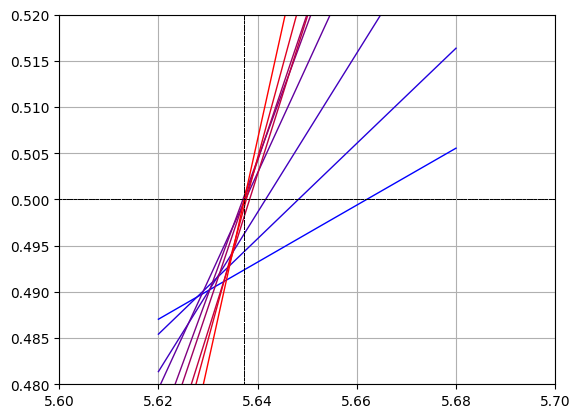

In [16]:
for i in range(0,R_Ns.shape[1]):
    R_N = R_Ns[:,i]
    plt.plot(N, R_N, lw=1, c=[i/8,0,1-i/8])
    plt.axhline(0.5, ls='--', c='k', lw=0.5)
    plt.axvline(5.63726, ls='--', c='k', lw=0.5)
    plt.xlim(5.6, 5.7)
    plt.ylim(0.48,0.52)
plt.grid()

In [68]:
R_Ns[7120]

array([0.50000136, 0.51229041, 0.52818833, 0.54295703, 0.55319905])

In [12]:
def find_nearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    err = np.abs(array[idx] - 0.5)
    return idx, array[idx], err

etas = []
errs = []
for i in range(9):
    idx, val, err = find_nearest(R_Ns[:,i], 0.5)
    print(val)
    eta = N[idx]
    etas.append(eta)
    errs.append(err)

0.4999993718928469
0.49999936672725753
0.49999973089162186
0.49999656115846625
0.4999958752827457
0.5000016726807643
0.49999792395216003
0.49999745135696727
0.5000008425251372


In [22]:
size[4:]

array([32, 36, 40, 48, 64])

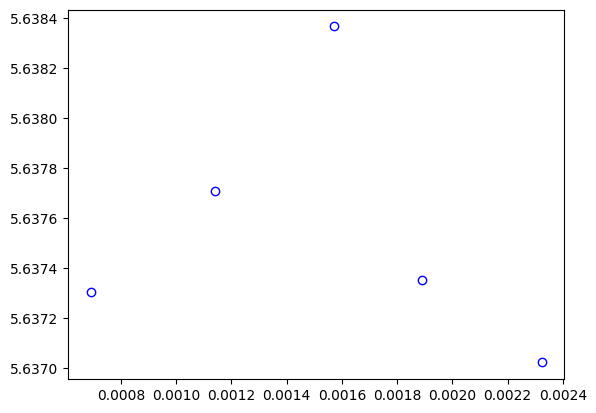

In [23]:
plt.plot(size[4:]**(-7/4), etas[4:], marker='o', c='b', mfc='w', ls='')

In [8]:
from numba.experimental import jitclass

In [11]:
from numba.experimental import jitclass
from numba import types, typed, typeof

class WireType(types.Type):
    def __init__(self):
        super(WireType, self).__init__(name='Wire')

params = typed.Dict.empty(
    key_type = 
)

spec = [
    ('start', types.UniTuple(types.float64, 2)),
    ('mid', types.UniTuple(types.float64, 2)),
    ('stop', types.UniTuple(types.float64, 2)),
    ('cluster', types.int32),
    ('coordinate_grid', t)
]

@jitclass(spec)
class Wire:
    def __init__(self, start, mid, stop, cluster=0):
        self.start = start
        self.mid = mid
        self.stop = stop
        self.cluster = cluster
        self.coordinate_grid = {(s1, s2) : [] for s1 in range(10) for s2 in range(10)}

wire = Wire((0.,0.), (0.,1.), (0.,2.), 0)

In [7]:
def first():
    res = set()
    for i in range(100):
        if i % 5 == 0:
            res.add(i)
    return res

%timeit first

9.64 ns ± 0.0574 ns per loop (mean ± std. dev. of 7 runs, 100,000,000 loops each)


In [8]:
def second():
    res = set(i for i in range(100) if i%5==0)
    return res

%timeit second

9.66 ns ± 0.0603 ns per loop (mean ± std. dev. of 7 runs, 100,000,000 loops each)


In [11]:
dic = {
    0: {0,1},
    1: {2,3,1},
    2: {0,4,5}
}

In [9]:
dic[0,1]

KeyError: (0, 1)

In [13]:
from operator import itemgetter
set.union(*itemgetter(0,1)(dic))


{0, 1, 2, 3}

In [8]:
def line_intersection(line1, line2):
    xdiff = (line1[0][0] - line1[1][0], line2[0][0] - line2[1][0])
    ydiff = (line1[0][1] - line1[1][1], line2[0][1] - line2[1][1])

    def det(a, b):
        return a[0] * b[1] - a[1] * b[0]

    div = det(xdiff, ydiff)
    if div == 0:
       raise Exception('lines do not intersect')

    d = (det(*line1), det(*line2))
    x = det(d, xdiff) / div
    y = det(d, ydiff) / div
    return x, y

# line_intersection(((1,1),(3,1)), ((2,2),(2,0)))
line_intersection(((0,2),(0,0)), ((10,11),(11,11)))

(0.0, 11.0)

In [1]:
from percolation import WireNetwork, percolate

In [2]:
network = WireNetwork(64, 64, 27)
n = percolate(network)


/Users/rkd/Research/Percolation/venv/lib/python3.10/site-packages/numba/core/ir_utils.py:2147: NumbaPendingDeprecationWarning: 
Encountered the use of a type that is scheduled for deprecation: type 'reflected list' found for argument 'neighbouring_wires' of function 'get_intercepts'.

For more information visit https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-reflection-for-list-and-set-types

File "percolation.py", line 179:
@jit(nopython=True, cache=True)
def get_intercepts(neighbouring_wires: list, start, stop) -> list:
^

  warnings.warn(NumbaPendingDeprecationWarning(msg, loc=loc))
/Users/rkd/Research/Percolation/percolating_wires/percolation.py:178: NumbaWarning: Cannot cache compiled function "get_intercepts" as it uses dynamic globals (such as ctypes pointers and large global arrays)
  @jit(nopython=True, cache=True)


In [1]:
64**2

4096

In [4]:
# import cProfile
from percolation import WireNetwork, percolate

network = WireNetwork(256, 256, 27)
n = percolate(network)

# cProfile.run('percolate(network)', sort='cumtime')

In [2]:
from joblib import Parallel, delayed
import multiprocessing
from tqdm import tqdm
import numpy as np

In [5]:
def job(size: int, seed: int) -> int:
    """Function to parallelize running multiple seeds

    Args:
        size (int): The size of the network
        seed (int): Random seed

    Returns:
        int: Critical number of wires to cause a spanning path from one side of
            the network to the other.
    """
    net = WireNetwork(size, size, seed=seed)

    return percolate(net)

In [7]:
import numpy as np
import concurrent.futures
from tqdm import tqdm
import multiprocessing


size = 128
seed_count = 76 * 10
total_seeds = np.arange(0, seed_count, dtype=int)
results256 = np.zeros((seed_count))
num_cores = multiprocessing.cpu_count()

# Using ProcessPoolExecutor for asynchronous execution
with concurrent.futures.ProcessPoolExecutor(max_workers=num_cores) as executor:
    # Create a list to hold the futures
    futures = [executor.submit(job, size, seed) for seed in total_seeds]

    # Process the results as they complete
    for future in tqdm(concurrent.futures.as_completed(futures), total=len(futures), ascii="░▒█", colour='GREEN', desc="Running..."):
        index = total_seeds[futures.index(future)]
        results256[index] = future.result()

Running...: 100%|██████████| 760/760 [04:50<00:00,  2.62it/s]


In [11]:
size = 
seed_count = 76*10
total_seeds = np.arange(0, seed_count, dtype=int)
results64 = np.zeros((seed_count))
num_cores = multiprocessing.cpu_count()

for i in tqdm(range(0, seed_count, num_cores), ascii="░▒█", colour='GREEN', desc="Running..."):
    seeds = total_seeds[i:i+num_cores]
    results64[i:i+num_cores] = Parallel(n_jobs=num_cores)(delayed(job)(size, seed) for seed in seeds)

Running...: 100%|██████████| 10/10 [00:12<00:00,  1.23s/it]


In [12]:
results64.mean()/(size**2)

5.6355642218338815

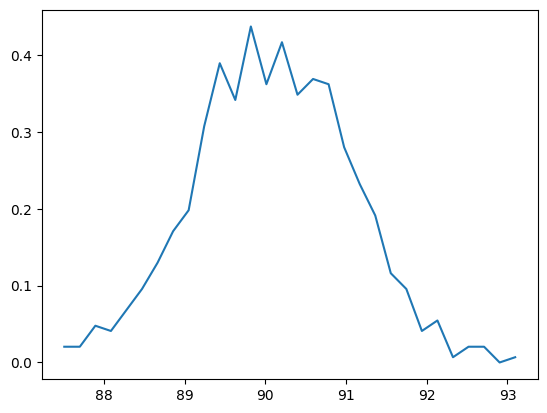

In [13]:
# plot histogram of results
import matplotlib.pyplot as plt
import numpy as np

h, edges = np.histogram(results/64**2, bins=30, density=True)

plt.plot(edges[:-1], h)